# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D,AveragePooling2D,SeparableConv2D
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop,Adam
from keras.layers.normalization import BatchNormalization

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


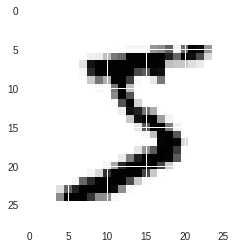

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)



In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:

model = Sequential()
 
model.add(Convolution2D(filters = 64,kernel_size =(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Convolution2D(filters = 16, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(SeparableConv2D(filters = 16,kernel_size =(3,3)))
model.add(Activation('relu'))
model.add(Convolution2D(filters = 16,kernel_size =(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(filters = 16,kernel_size =(3,3)))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Convolution2D(filters = 10, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        9232      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 10, 10, 16)        416       
__________

In [0]:
rmsprop = RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)

model.compile(loss='categorical_crossentropy',
             optimizer=rmsprop,
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=15, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/15
60000/60000 [==============================] - 14s 239us/step - loss: 0.1632 - acc: 0.9631
Epoch 2/15
60000/60000 [==============================] - 13s 214us/step - loss: 0.0600 - acc: 0.9820
Epoch 3/15
60000/60000 [==============================] - 13s 213us/step - loss: 0.0490 - acc: 0.9852
Epoch 4/15
60000/60000 [==============================] - 13s 213us/step - loss: 0.0432 - acc: 0.9873
Epoch 5/15
60000/60000 [==============================] - 13s 212us/step - loss: 0.0369 - acc: 0.9890
Epoch 6/15
60000/60000 [==============================] - 13s 213us/step - loss: 0.0345 - acc: 0.9894
Epoch 7/15
60000/60000 [==============================] - 13s 212us/step - loss: 0.0317 - acc: 0.9904
Epoch 8/15
60000/60000 [==============================] - 13s 212us/step - loss: 0.0294 - acc: 0.9908
Epoch 9/15
60000/60000 [==============================] - 13s 213us/step - loss: 0.0283 - acc: 0.9916
Epoch 10/15
60000/60000 [==============================] - 13s 213us/step - loss: 

In [0]:
model.save_weights("Assignment-3A.h5")

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.027136134917434537, 0.9926]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[7.6843982e-08 2.9765738e-07 7.6843982e-08 3.2360978e-07 7.6843982e-08
  7.6843982e-08 7.1106592e-07 9.9999821e-01 7.6843982e-08 7.6843982e-08]
 [6.0487153e-08 2.4084876e-08 9.9999952e-01 2.3874973e-09 5.5229732e-09
  2.3874973e-09 3.4052383e-07 2.3874973e-09 9.9831272e-09 2.3874973e-09]
 [1.9303297e-09 9.9999964e-01 3.0712510e-08 2.8882424e-10 1.6758221e-07
  3.4038212e-08 1.6444717e-07 1.6011544e-09 2.0879674e-10 6.7289854e-09]
 [9.9998784e-01 4.0942383e-09 7.7032452e-09 3.2043561e-09 5.8544124e-08
  3.2043561e-09 1.0388775e-05 1.6167659e-06 3.2043561e-09 9.7665385e-08]
 [1.9825588e-08 1.5989136e-06 1.9825588e-08 3.8033943e-06 9.9999380e-01
  1.9825588e-08 1.9825588e-08 7.2570607e-08 1.9825588e-08 5.8498068e-07]
 [2.8947302e-09 9.9999976e-01 4.7672017e-08 1.8978725e-11 5.8250542e-08
  1.8885618e-09 2.1592976e-07 7.6417672e-10 6.3169792e-10 1.5440533e-09]
 [3.4759885e-06 3.4759885e-06 2.6561062e-05 3.4759885e-06 9.9989879e-01
  3.4759885e-06 3.4759885e-06 3.4759885e-06 5.0372371e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

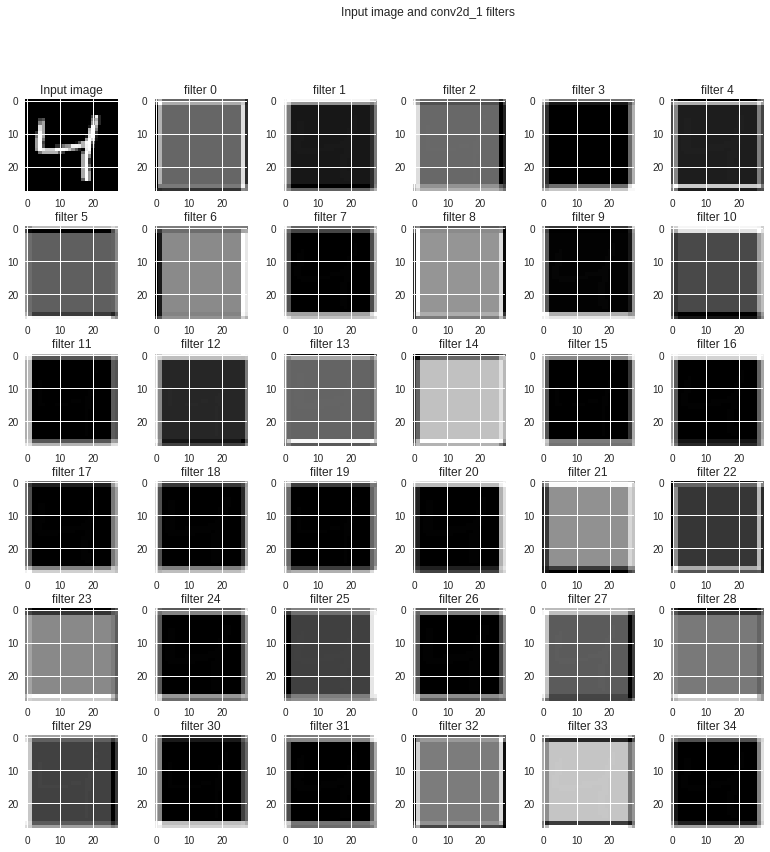

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()